## CSV 읽어들이기

In [1]:
import pandas as pd

df=pd.read_csv("fake_bills.csv",sep=";")
df.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


## Target 원 핫 인코딩
- is_genuine -> ["is_genuine_False", "is_genuine_True"]
- is_genuine 값이 True 면 ["is_genuine_False", "is_genuine_True"] = [0, 1]
- is_genuine 값이 False 면 ["is_genuine_False", "is_genuine_True"] = [1, 0]

In [2]:
df_encoded = pd.get_dummies(df, columns=["is_genuine", ])
df_encoded.head(10)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_False,is_genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,0,1
1,171.46,103.36,103.66,3.77,2.99,113.09,0,1
2,172.69,104.48,103.50,4.40,2.94,113.16,0,1
3,171.36,103.91,103.94,3.62,3.01,113.51,0,1
4,171.73,104.28,103.46,4.04,3.48,112.54,0,1
5,172.17,103.74,104.08,4.42,2.95,112.81,0,1
6,172.34,104.18,103.85,4.58,3.26,112.81,0,1
7,171.88,103.76,104.08,3.98,2.92,113.08,0,1
8,172.47,103.92,103.67,4.00,3.25,112.85,0,1
9,172.47,104.07,104.02,4.04,3.25,113.45,0,1


## 결측치 확인 (missingno library로 시각화)
- "margin_low" 열에 37개의 결측치 확인

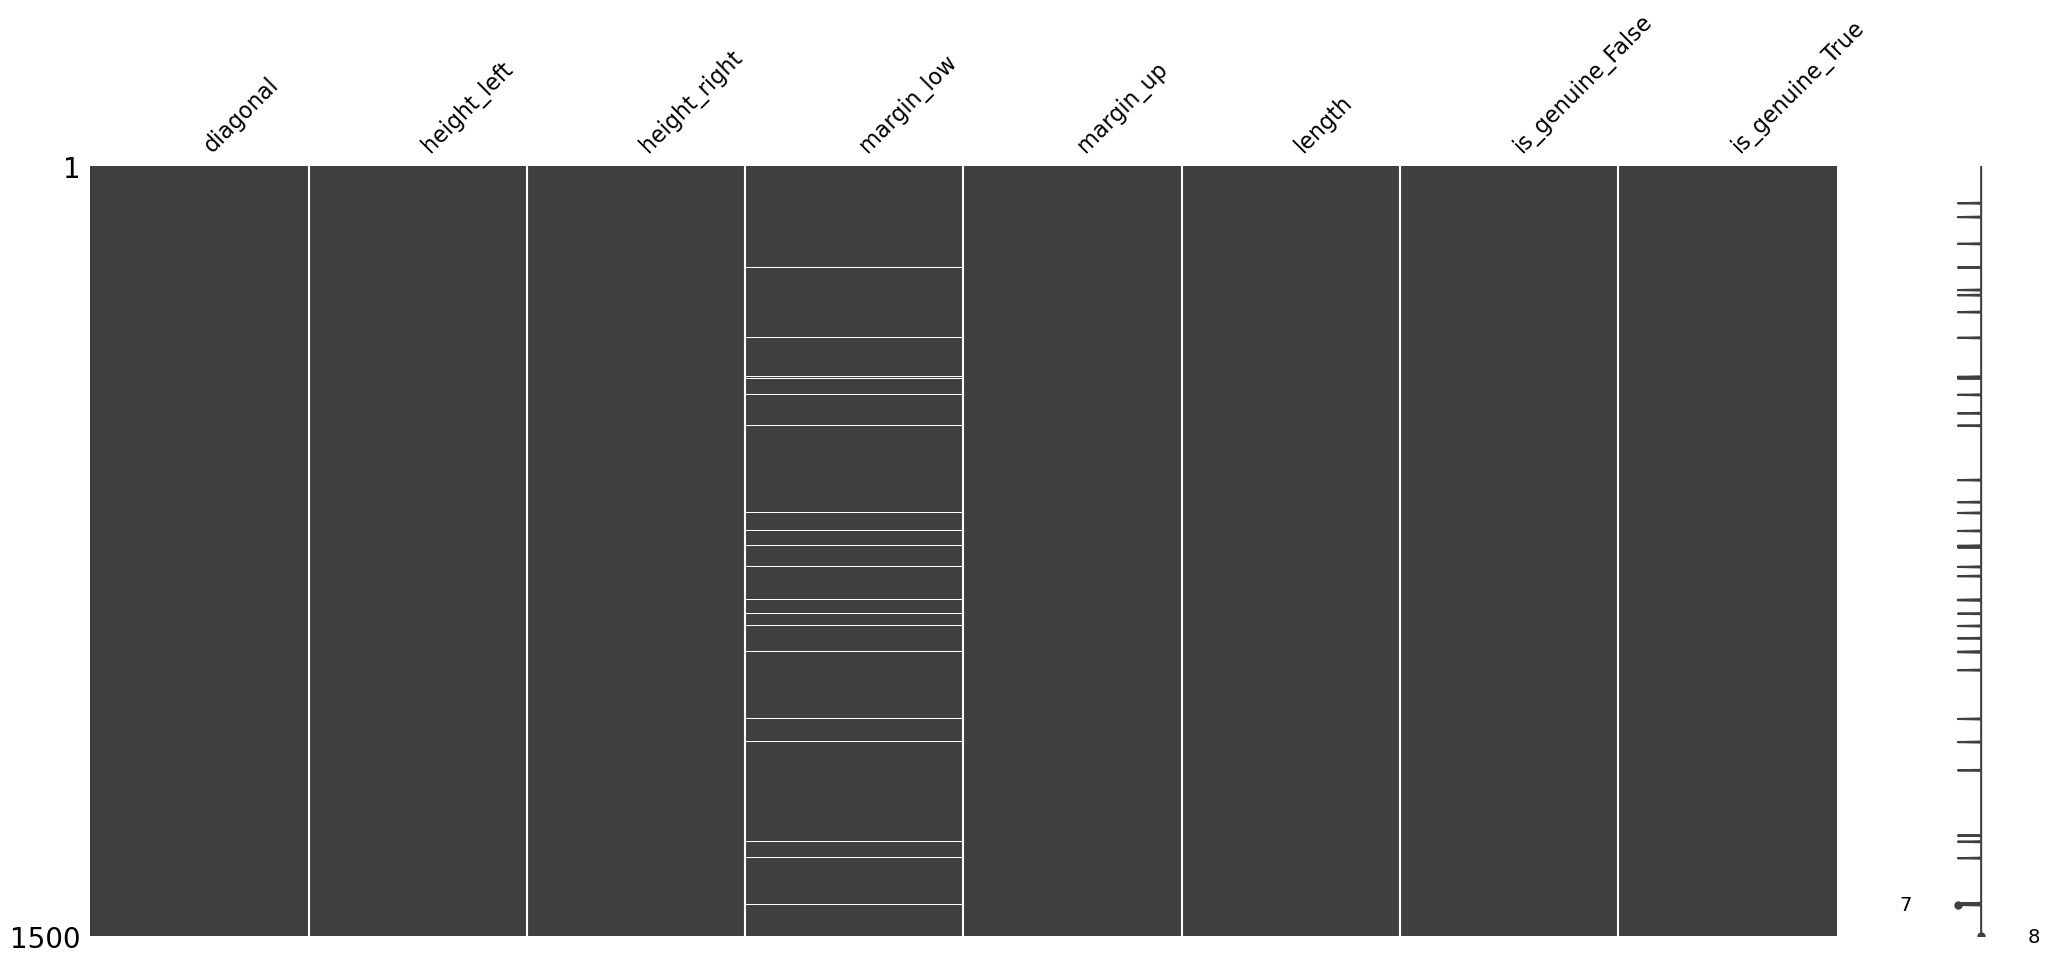

In [3]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_encoded)
plt.show()

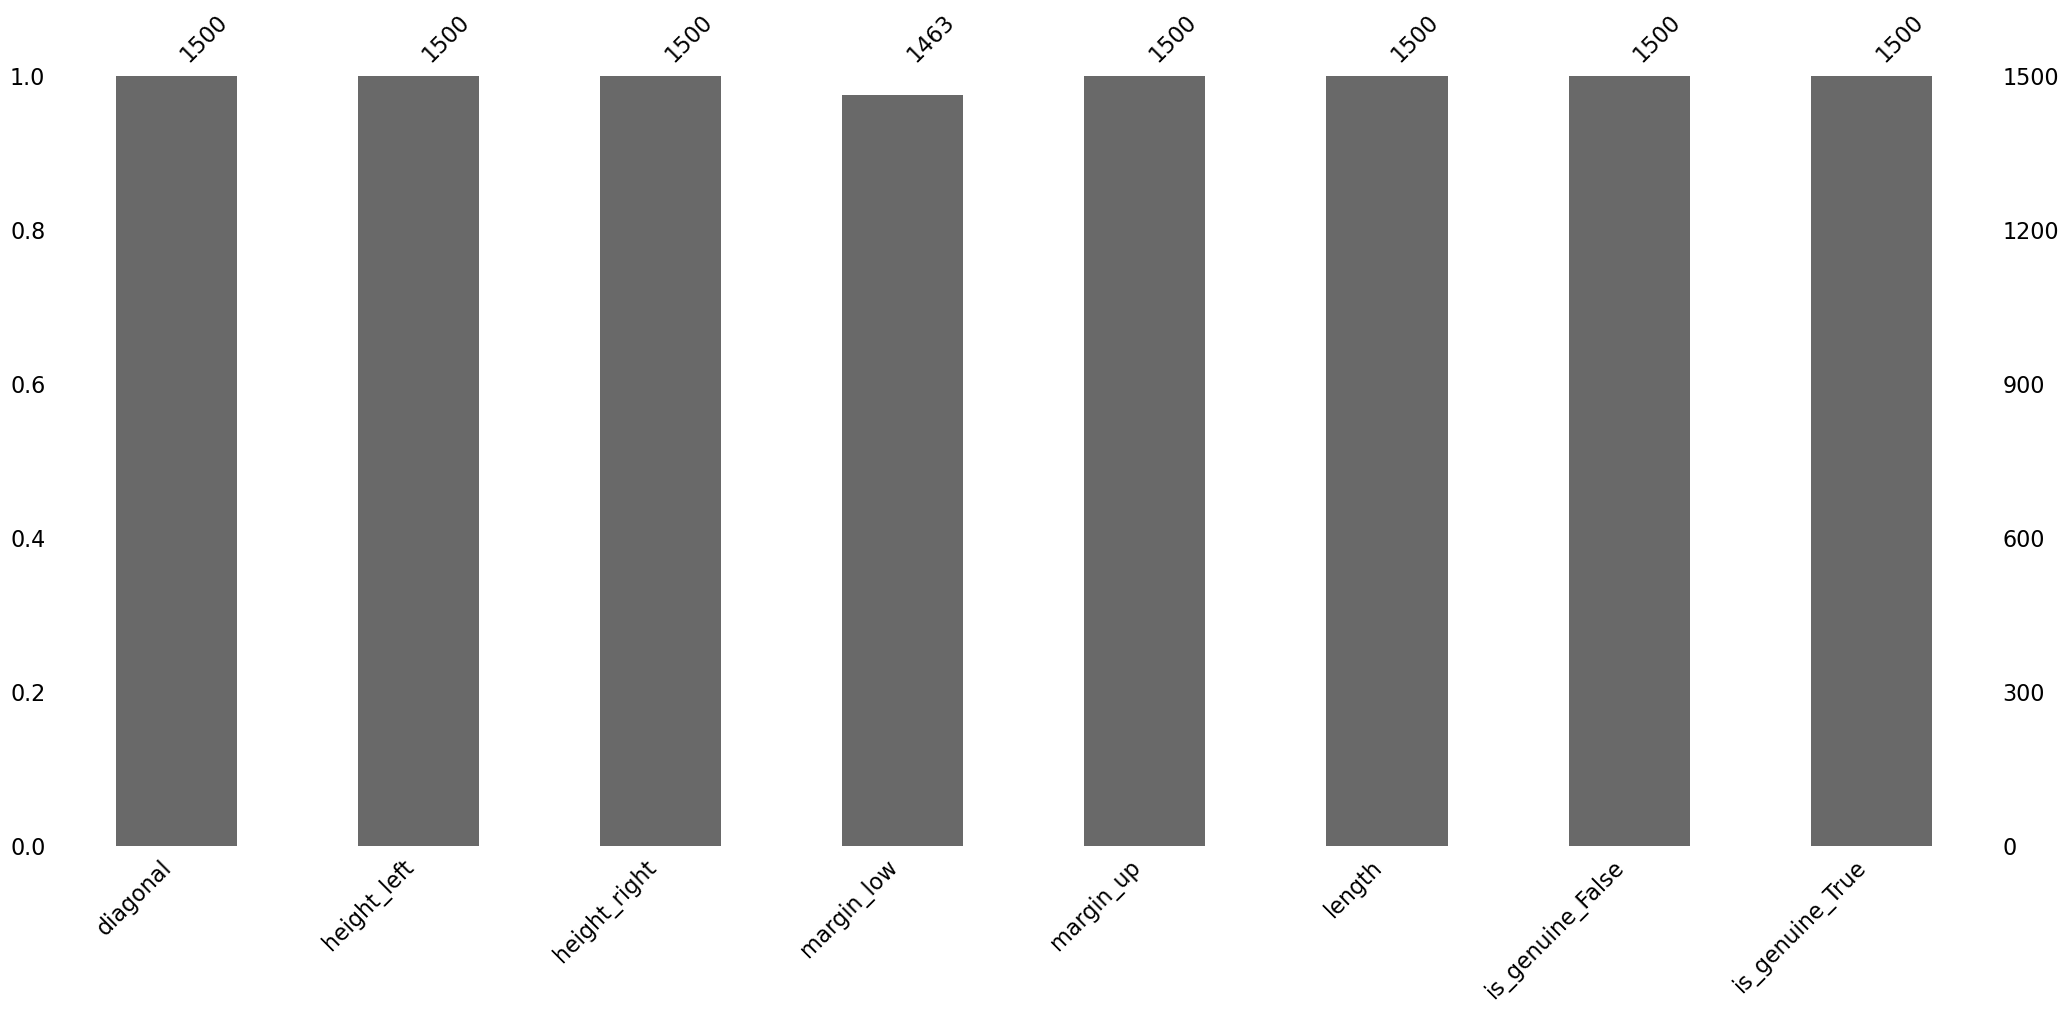

In [4]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df_encoded)
plt.show()

## KNN 알고리즘 활용하여 결측치 보간

In [5]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df_filled = imputer.fit_transform(df_encoded)
df_filled=pd.DataFrame(df_filled, columns=df_encoded.columns)

In [6]:
# 보간된 부분 값 확인 (녹색 부분)
filled_indices = df_encoded[df_encoded.isna().any(axis=1)].index
filled_mask = df_encoded.iloc[filled_indices].isna()
filled_style = df_filled.iloc[filled_indices].style.applymap(
                        lambda x: 'background-color: lightgreen',
                        subset=pd.IndexSlice[filled_mask.any(axis=1), filled_mask.any(axis=0)])

display(filled_style)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_False,is_genuine_True
72,171.940000,103.890000,103.450000,4.046000,3.250000,112.790000,0.000000,1.000000
99,171.930000,104.070000,104.180000,4.278000,3.140000,113.080000,0.000000,1.000000
151,172.070000,103.800000,104.380000,4.214000,3.020000,112.930000,0.000000,1.000000
197,171.450000,103.660000,103.800000,4.106000,3.620000,113.270000,0.000000,1.000000
241,171.830000,104.140000,104.060000,4.236000,3.020000,112.360000,0.000000,1.000000
251,171.800000,103.260000,102.820000,4.348000,2.950000,113.220000,0.000000,1.000000
284,171.920000,103.830000,103.760000,4.078000,3.230000,113.290000,0.000000,1.000000
334,171.850000,103.700000,103.960000,4.336000,3.000000,113.360000,0.000000,1.000000
410,172.560000,103.720000,103.510000,4.172000,3.120000,112.950000,0.000000,1.000000
413,172.300000,103.660000,103.500000,4.016000,3.160000,112.950000,0.000000,1.000000


## EDA 자료확인

### 히스토그램

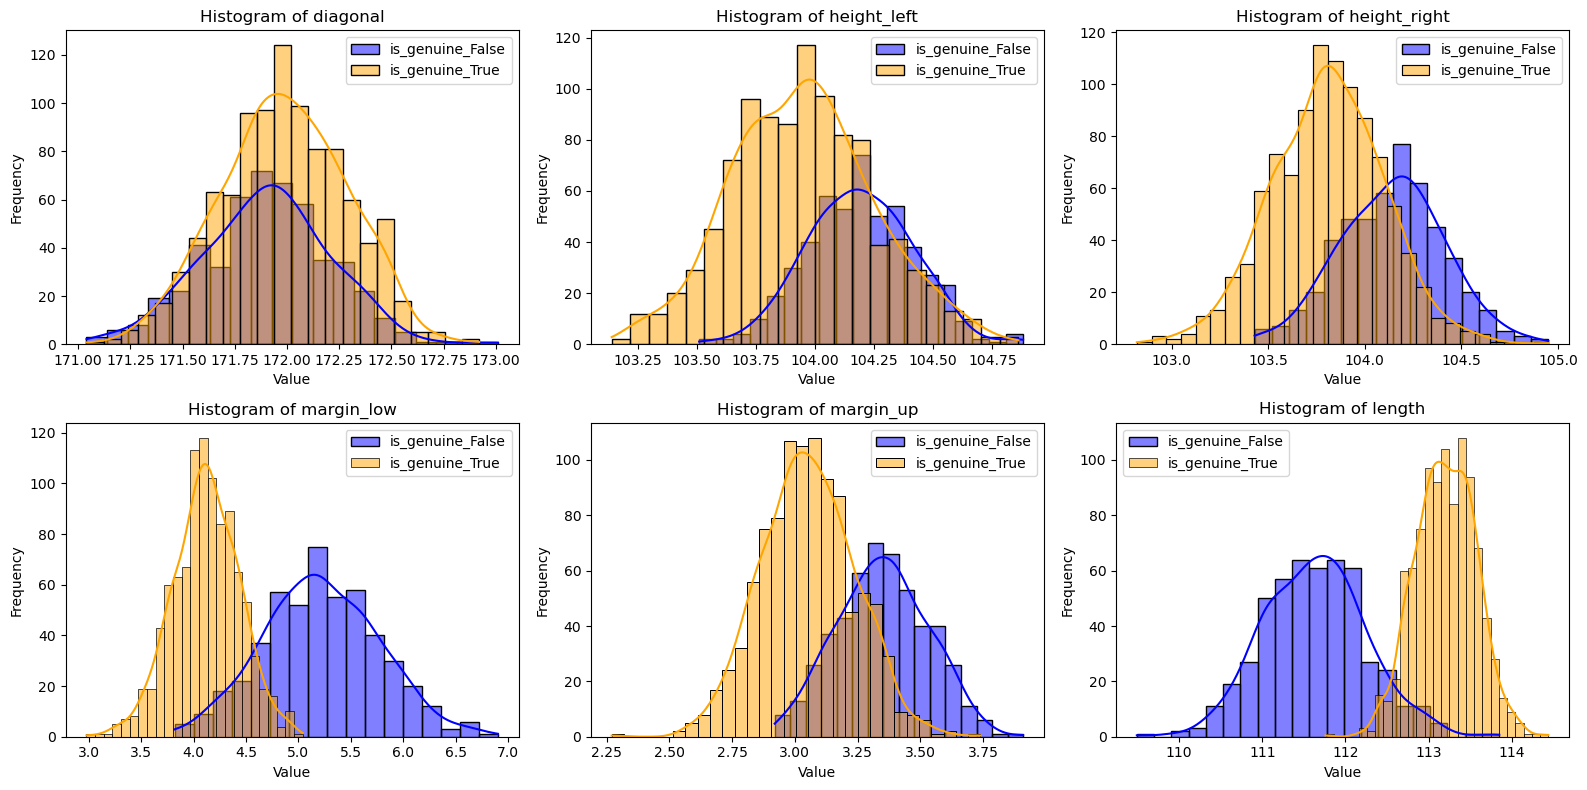

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 클래스별로 데이터 분할
df_false = df_filled[df_filled['is_genuine_False'] == 1].drop(['is_genuine_False', 'is_genuine_True'], axis=1)
df_true = df_filled[df_filled['is_genuine_True'] == 1].drop(['is_genuine_False', 'is_genuine_True'], axis=1)

# 히스토그램 출력
plt.figure(figsize=(16, 8))
for col in df_filled.columns[:-2]:
    plt.subplot(2, 3, df_filled.columns.get_loc(col) + 1)
    sns.histplot(df_false[col], kde=True, color='blue', label='is_genuine_False')
    sns.histplot(df_true[col], kde=True, color='orange', label='is_genuine_True')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
plt.tight_layout()
plt.show()


### Box Plot

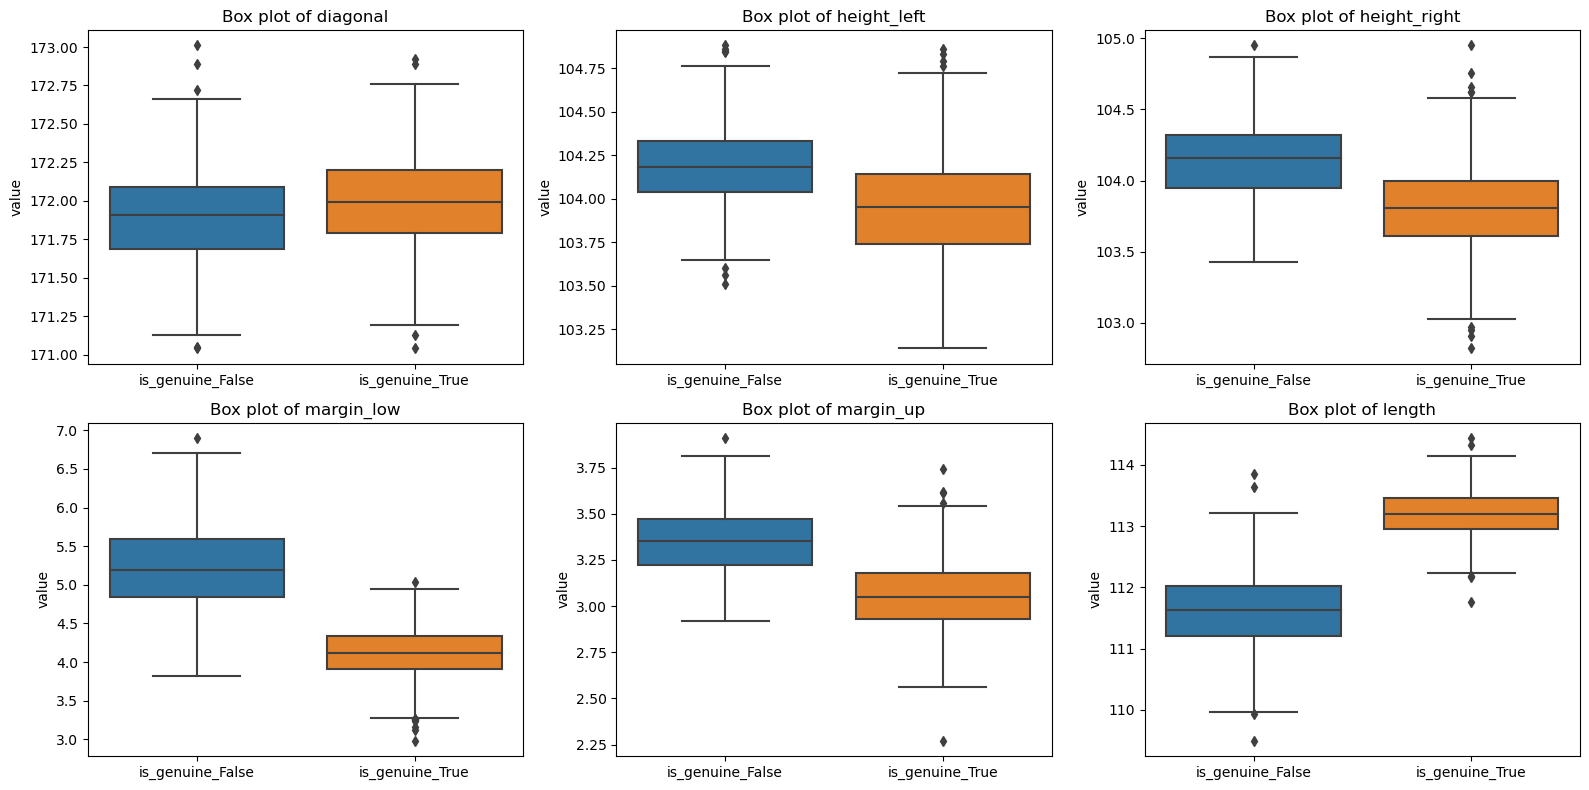

In [8]:
plt.figure(figsize=(16, 8))
for col in df_filled.columns[:-2]:
    plt.subplot(2, 3, df_filled.columns.get_loc(col) + 1)
    sns.boxplot(x = 'is_genuine_True', y = col, data = df_filled)
    plt.xticks([0, 1], ['is_genuine_False', 'is_genuine_True']) 
    plt.title(f'Box plot of {col}')
    plt.xlabel(None)
    plt.ylabel('value')
    
plt.tight_layout()
plt.show()


### 산점도

<Figure size 1600x800 with 0 Axes>

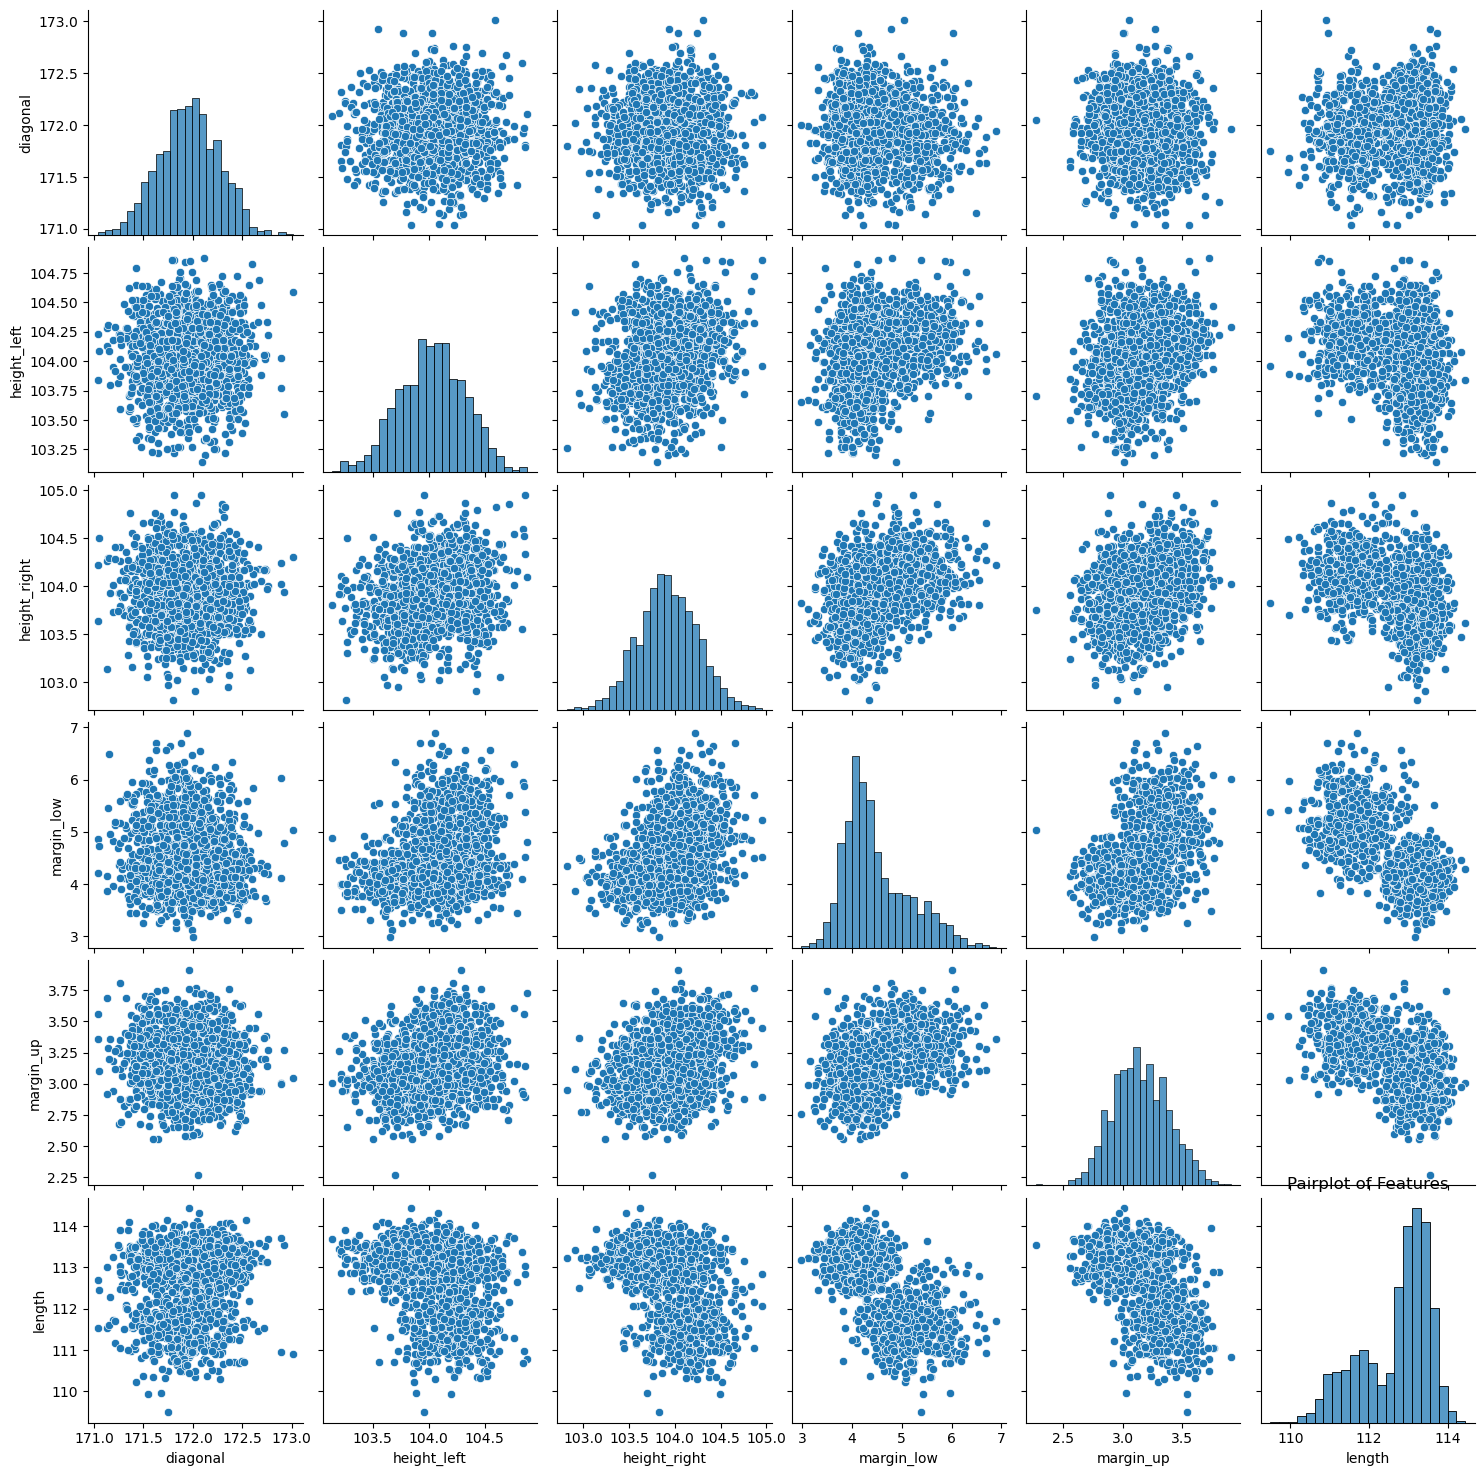

In [9]:
plt.figure(figsize=(16, 8))
sns.pairplot(df_filled.drop(['is_genuine_False', 'is_genuine_True'], axis=1))
plt.title('Pairplot of Features')
plt.show()

### 히트맵 그리기 - Numpy 이용

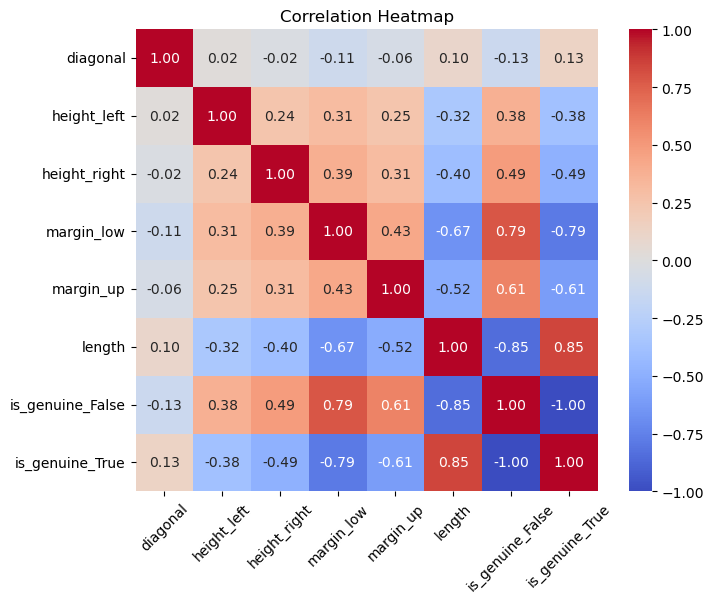

In [33]:
corr_mat = np.corrcoef(df_filled.values, rowvar=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],
           [df_filled.columns[0], df_filled.columns[1], df_filled.columns[2],
            df_filled.columns[3], df_filled.columns[4],df_filled.columns[5],
            df_filled.columns[6] ,df_filled.columns[7]]) 
plt.xticks(rotation=45)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],
           [df_filled.columns[0], df_filled.columns[1], df_filled.columns[2],
            df_filled.columns[3], df_filled.columns[4],df_filled.columns[5],
            df_filled.columns[6] ,df_filled.columns[7]]) 
plt.yticks(rotation=360)
plt.title('Correlation Heatmap')
plt.show()

## Standarization으로 Normalize

In [34]:
# 'is_genuine_False'와 'is_genuine_True' 열 제외한 열들에 대해 평균과 표준편차 계산
cols_to_standardize = df_filled.columns.difference(['is_genuine_False', 'is_genuine_True'])
means = df_filled[cols_to_standardize].mean()
stds = df_filled[cols_to_standardize].std()

# 각 열에 대해 표준화 수행
df_standardized = df_filled.copy()
df_standardized[cols_to_standardize] = (df_filled[cols_to_standardize] - means) / stds

df_standardized


,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_False,is_genuine_True
0,-0.486377,2.773198,3.162186,0.054597,-1.127949,0.173593,0.0,1.0
1,-1.633185,-2.235790,-0.799401,-1.082120,-0.696567,0.471509,0.0,1.0
2,2.397024,1.504255,-1.290761,-0.127278,-0.912258,0.551717,0.0,1.0
3,-1.960844,-0.399161,0.060478,-1.309463,-0.610290,0.952758,0.0,1.0
4,-0.748505,0.836390,-1.413601,-0.672902,1.417205,-0.158697,0.0,1.0
...,...,...,...,...,...,...,...,...
1495,-0.682973,1.170322,0.766808,-0.096965,-0.265185,-1.602443,1.0,0.0
1496,0.758728,2.005154,1.595977,1.191313,0.942685,-1.957651,1.0,0.0
1497,-0.519143,-0.065228,0.613258,1.555062,0.899546,-0.834737,1.0,0.0
1498,0.332771,0.836390,0.428998,1.039751,1.330928,-0.490988,1.0,0.0


## Grid Search로 최적의 hyperparameter 찾기

In [35]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


# features와 target 나누기
features = df_standardized.drop(['is_genuine_False', 'is_genuine_True'], axis=1)
target = df_standardized[['is_genuine_False', 'is_genuine_True']]

# 훈련 세트와 테스트 세트로 데이터 분할
# stratify 사용
train_features, test_features, train_target, test_target = train_test_split(
                                                                features,
                                                                target,
                                                                test_size=0.2,
                                                                stratify=target,
                                                                random_state=42)

# 모델 선언
model = KNeighborsClassifier()

# 그리드 서치를 위한 파라미터 정의
params_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# 그리드 서치 수행
grid_search = GridSearchCV(model, params_grid, cv=10, scoring='accuracy')
grid_search.fit(train_features, train_target)

# 최적의 파라미터 출력
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best weight:", grid_search.best_params_['weights'])
print("Best metric:", grid_search.best_params_['metric'])
print("Best algorithm:", grid_search.best_params_['algorithm'])

# Train Score 출력
print("Best Train Score:", grid_search.best_score_)


Best k: 5
Best weight: uniform
Best metric: euclidean
Best algorithm: auto
Best Train Score: 0.9916666666666668


## Test Set에 대한 결과

In [37]:
output = grid_search.predict(test_features)

In [44]:
from sklearn.metrics import accuracy_score
print("Test Score : ", accuracy_score(output, test_target))

Test Score :  0.99


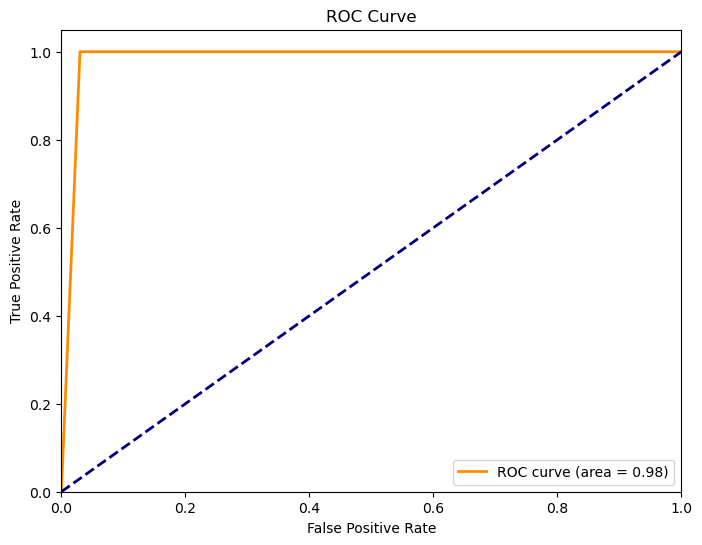

In [61]:
from sklearn.metrics import roc_curve, auc

# 클래스 1에 대한 ROC curve
fpr, tpr, _ = roc_curve(test_target['is_genuine_True'].values, output[:, 1])
# AUC 계산
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend(loc="lower right")
plt.show()
